**[Do not edit the contents of this cell]**

# MSc in Bioinformatics and Theoretical Systems Biology - Maths and Stats Assignment 2018/19

This assignment is to be completed in Python, R or Julia and returned as a Jupyter notebook. There are 4 types of cells used in this notebook:
1. Cells containing tasks and instructions to be completed. Do not edit these. These are clearly labelled.
2. Cells in which you are meant to provide an answer in Markdown format.
3. Cells containing code that defines e.g. which packages to load, but can also contain routines and snippets of codes that you should use.
4. Cells that contain the Python/R/Julia code that you write to solve the problems set.

Each of these cells will contain explit comments at the top telling you whether to edit or not edit a cell. In Code cells comments are specified by the "#" character. In the Markdown Answer Cells, replace the xxx by your answer, whenever these are present. You will have to execute all code and Markdown cells in order to (i) make use of the provided code, and (ii) format the markdown appropriately.

There are four problems to be tackled:
1. Data exploration [40%]
2. Hypothesis testing [20%]
3. Regression [20%]
4. Classification [20%]

For each questions there several parts of different difficulty. Where appropriate, further reading will be given at the start of each question.

You will have to specify which language (and version) you used and all packages needed in order to run all Code cells. Please add this information in the next two cells. You can also use a mix of languages but any change has to be clearly indicated in the appropriate cell.

The kernel for this Jupyter notebook is xxx, version xxx, with the following packages: xxx, xxx

In [175]:
# here import all libraries or packages needed
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline
# ...

**[Do not edit the contents of this cell]**

## Problem 1: data exploration

We consider a subset of data coming from a putative association study where researchers collected various metrics and phenotypes to find associations with a putative generic cardiovascular disease.
All recruited subjects are adults.
For each subject several predictor variables are recorded: sex, height (in cm), mass (in kg), whether is a smoker or not, her/his ethnicity, and levels of 5 different metabolites (labelled A-E).
Each subject has a unique ID number. 
For each subject a disease score, the response variable, measuring the severity of the disease phenotype in arbitrary units, is provided.
The data is provided in the file `association.csv`.

### Part 1

Load the dataset `association.csv`.
How many unique records of subjects do we have? How many unique predictor variables?

In [176]:
# [Write your code in this cell]
# df = pd.read_csv("data/cereal.csv")
association_df = pd.read_csv('association.csv')
association_df.set_index('subject', inplace=True)

association_indep_df = association_df.drop(['disease_score'], axis=1)
association_dep_df = association_df['disease_score']


# association_dep_df.columns = ['disease_score']

In [177]:
# type(association_dep_df)

In [178]:
association_indep_df.head(5)

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E
subject,,,,,,,,,,
ID85,1,171.476882,71.070214,0,Asian,0.777283,1.544216,0.200118,4.963626,9.981923
ID86,0,186.503967,80.276194,0,Black/African/Caribbean,0.984182,2.040572,0.293487,5.250400,10.745194
ID48,1,177.289453,70.102716,1,Other,0.989442,1.983742,0.410665,4.302722,9.032480
ID4,0,182.755756,76.286511,0,White,0.998088,1.940030,0.183667,4.243840,8.597430
ID63,1,178.761595,70.987086,0,Asian,0.893859,1.794609,0.554105,4.006878,8.530953


In [179]:
association_indep_df.shape

(106, 10)

In [180]:
# association_df.info()

**[Provide your answer here]**
- The number of unique records of subjects in the dataset is: 105
- The number of variables in the dataset is: 11

**[Do not edit the contents of this cell]**

### Part 2

Produce a plot to illustrate the distribution of variables sex, mass, ethnicity, metabolite_A. Choose the most appropriate visualisation depending on the type of each variable.

In [181]:
# Prior to plotting distribution I will deal with duplicates
association_indep_df.loc[association_indep_df.duplicated(keep=False),:]

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E
subject,,,,,,,,,,
ID18,0,177.942864,80.523783,1,Other,0.919727,1.860333,0.228201,5.488476,11.25401
ID18,0,177.942864,80.523783,1,Other,0.919727,1.860333,0.228201,5.488476,11.25401


In [194]:
association_indep_df.drop_duplicates(keep='first', inplace=True)
association_dep_df.drop_duplicates(keep='first', inplace=True)

In [195]:
association_indep_df.shape # I have removed the second of the duplicated ID18 training examples
association_dep_df.shape # I have removed the second of the duplicated ID18 training examples

(105,)

In [196]:
# Given that the data set is small I do not want to discard entries, hence I will use imputaitoin to fill NaN values.

association_indep_df[association_indep_df.isnull().values]
# association_df.isnull().sum()
# association_df[association_df['metabolite_A'].isnull()]

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,BMI
subject,,,,,,,,,,,
ID23,1,177.870009,70.992259,0,Black/African/Caribbean,NaN,1.274922,0.306667,4.953703,10.237791,22.439106
ID87,1,178.793400,72.141244,0,Black/African/Caribbean,NaN,1.868261,0.201052,4.219526,8.662771,22.567355


In [197]:
# Create a new dataframe containing only completed values.
association_indep_full_df = association_indep_df.dropna()
association_indep_full_df.shape

(103, 11)

In [198]:
# met_A_median = association_indep_df['metabolite_A'].median()
# print(met_A_median)

# association_indep_df['metabolite_A'].fillna(value = met_A_median, inplace=True)

# association_indep_df.isnull().sum()
# association_indep_df.iloc[[9,34]]

/home/patrick/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


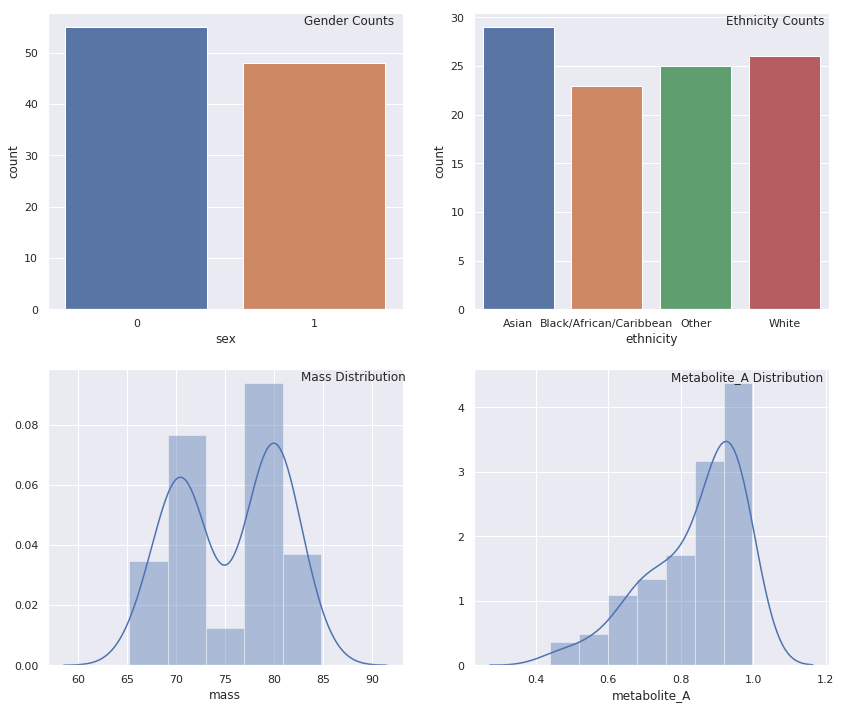

In [199]:
# [Write your code in this cell]
sns.set(style="darkgrid")


fig = plt.figure(figsize=(14,12))
fig.add_subplot(2,2,1)
# sns.countplot(x="class", data=titanic)
sns.countplot(association_indep_full_df['sex'])
plt.title('Gender Counts', y=0.94, x=0.85)

fig.add_subplot(2,2,2)
sns.countplot(association_indep_full_df['ethnicity'])
plt.title('Ethnicity Counts', y=0.94, x=0.85)

fig.add_subplot(2,2,3)
sns.distplot(association_indep_full_df['mass'])
plt.title('Mass Distribution', y=0.94, x=0.86)

fig.add_subplot(2,2,4)
sns.distplot(association_indep_full_df['metabolite_A'])
plt.title('Metabolite_A Distribution', y=0.94, x=0.77)

plt.show()
# ax = fig.add_subplot(2, 2,1)

**[Do not edit the contents of this cell]**

### Part 3

Write a function that returns the Body Mass Index (BMI).Calculate BMI for each subject and add it as new variable in the data set.

In [200]:
# [Write your code in this cell]

association_indep_df['BMI'] = association_indep_df['mass']/(association_indep_df['height']/100)**2

In [201]:
association_indep_df.head(5)

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,BMI
subject,,,,,,,,,,,
ID85,1,171.476882,71.070214,0,Asian,0.777283,1.544216,0.200118,4.963626,9.981923,24.169990
ID86,0,186.503967,80.276194,0,Black/African/Caribbean,0.984182,2.040572,0.293487,5.250400,10.745194,23.078662
ID48,1,177.289453,70.102716,1,Other,0.989442,1.983742,0.410665,4.302722,9.032480,22.303296
ID4,0,182.755756,76.286511,0,White,0.998088,1.940030,0.183667,4.243840,8.597430,22.840501
ID63,1,178.761595,70.987086,0,Asian,0.893859,1.794609,0.554105,4.006878,8.530953,22.214212


**[Do not edit the contents of this cell]**

### Part 4

Calculate the correlation matrix between numerical predictors. Use this information to impute any missing values, if possible.

In [202]:
# [Write your code in this cell]
# df.drop(['B', 'C'], axis=1)

association_num_df = association_indep_df.drop(['sex', 'smoker', 'ethnicity'], axis=1)
# association_num_df

,height,mass,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,BMI
height,1.000000,-0.025994,0.001490,0.009982,0.168668,-0.030849,-0.007210,-0.635011
mass,-0.025994,1.000000,-0.078896,-0.052697,-0.049396,0.080060,0.062709,0.786219
metabolite_A,0.001490,-0.078896,1.000000,0.983715,-0.067958,-0.185901,-0.194760,-0.055390
metabolite_B,0.009982,-0.052697,0.983715,1.000000,-0.062237,-0.182491,-0.191910,-0.039499
metabolite_C,0.168668,-0.049396,-0.067958,-0.062237,1.000000,0.114041,0.196326,-0.144810
metabolite_D,-0.030849,0.080060,-0.185901,-0.182491,0.114041,1.000000,0.994901,0.084319
metabolite_E,-0.007210,0.062709,-0.194760,-0.191910,0.196326,0.994901,1.000000,0.055517
BMI,-0.635011,0.786219,-0.055390,-0.039499,-0.144810,0.084319,0.055517,1.000000


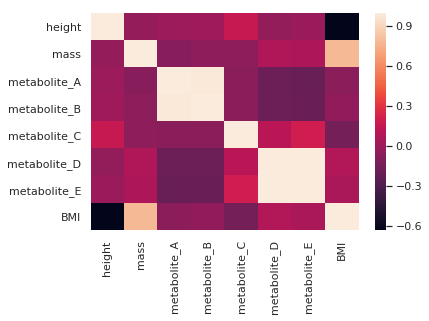

In [203]:
corr = association_num_df.corr()
sns.heatmap(corr)
corr
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(association_num_df, figsize=(15, 10))

In [204]:
# import statsmodels.api as sm

# X = association_full_df['metabolite_B']
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# y = association_full_df['metabolite_A']

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()

# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

# intercept = 0.0332
# coeff = 0.4795


# association_df['metabolite_B'][9] * coeff + intercept

# association_df['metabolite_B'][34] * coeff + intercept

# model.predict(10)



In [209]:
# association_df = pd.read_csv('association.csv')
from sklearn.linear_model import LinearRegression

# X = association_indep_full_df['metabolite_B']
# Y = association_indep_full_df['metabolite_A']

lin_reg = LinearRegression()

X = association_indep_full_df['metabolite_B'].values
X = X.reshape(103,1)
Y = association_indep_full_df['metabolite_A'].values
Y = Y.reshape(103,1)

model = lin_reg.fit(X,Y)
# X.shape

In [210]:
# trial loc methods
# association_df.xs(9)['metabolite_A'] = lin_reg.predict(association_df['metabolite_B'][9])[0][0]
# association_df.xs(34)['metabolite_A'] = lin_reg.predict(association_df['metabolite_B'][34])[0][0]

In [211]:

association_indep_df.loc[['ID23', 'ID87']]
# association_df.loc['metabolite_A']

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,BMI
subject,,,,,,,,,,,
ID23,1,177.870009,70.992259,0,Black/African/Caribbean,NaN,1.274922,0.306667,4.953703,10.237791,22.439106
ID87,1,178.793400,72.141244,0,Black/African/Caribbean,NaN,1.868261,0.201052,4.219526,8.662771,22.567355


In [212]:
association_indep_df['metabolite_B'][9]

1.274922203025

In [213]:
association_indep_df['metabolite_B'].loc['ID23']

1.274922203025

In [214]:
lin_reg.predict(association_df['metabolite_B'][9])[0][0]

0.6444997366952996

In [215]:
association_indep_df['metabolite_A'].loc[['ID23']] = lin_reg.predict(association_df['metabolite_B'].loc['ID23'])[0][0]
association_indep_df['metabolite_A'].loc[['ID87']] = lin_reg.predict(association_df['metabolite_B'].loc['ID87'])[0][0]
# association_df.loc[['ID87']] = lin_reg.predict(association_df['metabolite_B'][34])[0][0]

/home/patrick/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [216]:
association_indep_df.loc[['ID23', 'ID87']]

# association_df.isnull().sum()

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,BMI
subject,,,,,,,,,,,
ID23,1,177.870009,70.992259,0,Black/African/Caribbean,0.644500,1.274922,0.306667,4.953703,10.237791,22.439106
ID87,1,178.793400,72.141244,0,Black/African/Caribbean,0.929075,1.868261,0.201052,4.219526,8.662771,22.567355


**[Do not edit the contents of this cell]**

### Part 5

Assuming that a disease status is recorded when the disease score is greater than 5, add a new response variable in the dataset defining the diseases status of each subject.

In [217]:
association_dep_df.shape

(105,)

In [218]:
# [Write your code in this cell]
association_indep_df['disease_status'] = np.where(association_dep_df > 5, 1, 0)

# 14 diseased people
# association_indep_df['disease_status'].sum()

In [219]:
association_indep_df['disease_status'].sum()

14

**[Do not edit the contents of this cell]**

## Problem 2: hypothesis testing

Starting from the same dataset in Problem 1, provide answers for the following questions.

### Part 1

Given this sample space of subjects, what is the probability that a given subject is diagnosed as diseased? What is the probability that a subject is diagnosed as diseased given that he/she is not a smoker?

In [220]:
# [Write your code in this cell]

association_indep_df.groupby('disease_status').size().div(len(association_indep_df))

disease_status
0    0.866667
1    0.133333
dtype: float64

In [221]:
association_indep_df.groupby(['smoker', 'disease_status']).size()


smoker  disease_status
0       0                 74
        1                  7
1       0                 17
        1                  7
dtype: int64

In [222]:
# association_indep_df.groupby('disease_status').size()
association_indep_df.groupby('smoker').size()

smoker
0    81
1    24
dtype: int64

In [223]:
# non smokers who are disease
7/81

0.08641975308641975

**[Provide your answer here]**
- The probability that a subject is diseased is: xxx
- The probability that a subject is diseased given that she/he is not a smoker is: xxx

**[Do not edit the contents of this cell]**

### Part 2

Assuming that they are Normally distributed, estimate mean and variance for the distributions of height and mass separately for males and females. Use **either** a frequentist **or** likelihoodist **or** Bayesian approach.

In [224]:
# [Write your code in this cell]

print('Height')
print('Mean woman height: ' + str(association_indep_df.loc[association_indep_df['sex'] == 1]['height'].mean()))
print('Variance woman height: ' + str(association_indep_df.loc[association_indep_df['sex'] == 1]['height'].var()))

print('Mean man height: ' + str(association_indep_df.loc[association_indep_df['sex'] == 0]['height'].mean()))
print('Variance man height: ' + str(association_indep_df.loc[association_indep_df['sex'] == 0]['height'].var()))


print('\nMass')
print('Mean woman mass: ' + str(association_indep_df.loc[association_indep_df['sex'] == 1]['mass'].mean()))
print('Variance woman mass: ' + str(association_indep_df.loc[association_indep_df['sex'] == 1]['mass'].var()))

print('Mean man mass: ' + str(association_indep_df.loc[association_indep_df['sex'] == 0]['mass'].mean()))
print('Variance man mass: ' + str(association_indep_df.loc[association_indep_df['sex'] == 0]['mass'].var()))





Height
Mean woman height: 178.18186776141937
Variance woman height: 21.17244615491872
Mean man height: 178.77109675031406
Variance man height: 27.03025338771781

Mass
Mean woman mass: 70.33025107998441
Variance woman mass: 4.053329369363679
Mean man mass: 80.10691251520628
Variance man mass: 3.487426146492937


**[Do not edit the contents of this cell]**

### Part 3

Test whether height is different between males and females. Perform the same test on the mass variable. Define (in words) which ones are your null and alternative hypotheses and significance threshold. Finally, discuss (in words) any conclusion you can make out the results of your statistical tests.

In [225]:
x_diff = 178.77109675031406-178.18186776141937
T_score = 2.009 # t-stat associated with alpha 0.05/2 and 49 degrees of freedom (50-1) danielsoper.com
SE = np.sqrt((21.17244615491872/55)+(27.0302533877178/50))
ME = T_score*SE

print('x_diff: '+str(x_diff)+'\n')
print(x_diff-ME, x_diff+ME)

# H0 = x_diff = 0
# HA = x_diff != 0

H0 = 0

Z_score = (x_diff - H0)/SE
Z_score


x_diff: 0.5892289888946891

-1.3435487060072704 2.522006683796649


0.612466214718748

In [226]:
# [Write your code in this cell]


wom_height = association_indep_df.loc[association_indep_df['sex'] == 1]['height']
man_height = association_indep_df.loc[association_indep_df['sex'] == 0]['height']

print(stats.ttest_ind(wom_height, man_height))

Ttest_indResult(statistic=-0.612432005198897, pvalue=0.5416017014078051)


In [227]:
wom_height = association_indep_df.loc[association_indep_df['sex'] == 1]['mass']
man_height = association_indep_df.loc[association_indep_df['sex'] == 0]['mass']

In [228]:
# print(stats.ttest_ind(wom_mass, man_mass))
print(stats.ttest_ind(wom_mass, man_mass, equal_var = False))

Ttest_indResult(statistic=-25.721436706305806, pvalue=6.694124145896172e-46)


**[Provide your answer here]**


**[Do not edit the contents of this cell]**

### Part 4

Repeat the statistical test in Part 3 for all numerical predictor variables in the dataset. How many tests are significant with $\alpha=0.05$?
Calculate corrected p-values for multiple tests using a Bonferroni correction. How many tests are significant now? 

In [229]:
# [Write your code in this cell]


In [230]:
df_columns = list(association_num_df.columns.values)
df_columns

['height',
 'mass',
 'metabolite_A',
 'metabolite_B',
 'metabolite_C',
 'metabolite_D',
 'metabolite_E',
 'BMI']

In [231]:
def TTestParams(myList):
    woman_values = []
    man_values = []
    p_values = []
    for i in myList:
        
        woman =association_indep_df.loc[association_indep_df['sex'] == 1][i]
        man =association_indep_df.loc[association_indep_df['sex'] == 0][i]
        
        p_val = stats.ttest_ind(woman, man, equal_var = False)
        p_values.append(p_val)
    return(p_values)

In [232]:
c = TTestParams(df_columns)

In [233]:
c

[Ttest_indResult(statistic=-0.616020797475073, pvalue=0.539240682310238),
 Ttest_indResult(statistic=-25.721436706305806, pvalue=6.694124145896172e-46),
 Ttest_indResult(statistic=0.6845287201755234, pvalue=0.4951901695220233),
 Ttest_indResult(statistic=0.549891631577453, pvalue=0.5835844982018759),
 Ttest_indResult(statistic=0.9282407811931965, pvalue=0.3555065814214443),
 Ttest_indResult(statistic=-0.3685963357489555, pvalue=0.7131894616375611),
 Ttest_indResult(statistic=-0.21945521639816526, pvalue=0.8267336781040077),
 Ttest_indResult(statistic=-9.474208993625004, pvalue=1.5205052418644302e-15)]

**[Do not edit the contents of this cell]**

## Problem 3: regression

Assume you have been provided a new variable indicating a generic glucose index level. We know that such glucose index is related to the variable `metabolite_D` given in the previous dataset.

### Part 1

Load the new dataset called `glucose.csv` which gives the measure of a generic glucose level (`glucose_index`) for each tested subject. Perform a regression where `metabolite_D` is the predictor and `glucose_index` is the response variable.

In [ ]:
# [Write your code in this cell]


**[Do not edit the contents of this cell]**

## Problem 4: classification

### Part 1

Implement an algorithm to predict the disease status of a subject given all response variables provided in the dataset. You are free to choose the appropriate statistical tool you prefer. Assess the quality of your classifier.

In [ ]:
# [Write your code in this cell]


**[Do not edit the contents of this cell]**

### Part 2

Given the classifier you devised in Part 1, predict the disease status of the following subject:
- subject: ID986
- sex: 1
- height: 180.2
- mass: 70.1
- smoker: 1
- ethnicity: "White"
- metabolite_A: 0.5
- metabolite_B: 1.2
- metabolite_C: 0.5
- metabolite_D: 8.5
- metabolite_E: 10.2

In [4]:
# [Write your code in this cell]


In [ ]:
# split
def split_train_test(data, test_ratio):
shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * test_ratio)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]
return data.iloc[train_indices], data.iloc[test_indices]
You can then use this function like this:
>>> train_set, test_set = split_train_test(housing, 0.2)
>>> print(len(train_set), "train +", len(test_set), "test")